# CSO Monthly deaths data + RIP.ie

In [1]:
import pandas as pd
import pylab as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl
import pylab as plt
import matplotlib.dates as mdates
import datetime
sns.set_context('talk')
pd.set_option('display.width', 150)
locator = mdates.AutoDateLocator(minticks=4, maxticks=10)
formatter = mdates.ConciseDateFormatter(locator)
sns.set_style("white")

In [2]:
rip = pd.read_csv('rip_deaths_monthly.csv')
rm = rip.melt('month',var_name='year',value_name='deaths')
rm['month_name'] = rm.month.apply(lambda x: datetime.datetime.strptime(str(x), "%m").strftime('%B'))
rm['year'] = rm.year.astype(int)

In [5]:
cso = pd.read_csv('cso_deaths_monthly.csv')
cso['month'] = cso.month_name.apply(lambda x: datetime.datetime.strptime(x[:3], "%b").month)
#add rip data
cso = pd.concat([cso,rm]).dropna(subset=['deaths'])

In [6]:
#combine with pop data to get deaths per thousand
pop = pd.read_csv('ireland_population.csv')
cso = cso.merge(pop,on='year').dropna()
cso['deathsperthousand'] = (cso.deaths/cso['pop'])*1000
cso

,year,month_name,deaths,month,pop,deathsperthousand
0,2005,January,2801,1,4133800,0.677585
1,2005,February,2398,2,4133800,0.580096
2,2005,March,2660,3,4133800,0.643476
3,2005,April,2485,4,4133800,0.601142
4,2005,May,2385,5,4133800,0.576951
...,...,...,...,...,...,...
187,2020,August,2509,8,4937786,0.508122
188,2020,September,2516,9,4937786,0.509540
189,2020,October,2842,10,4937786,0.575562
190,2020,November,2690,11,4937786,0.544779


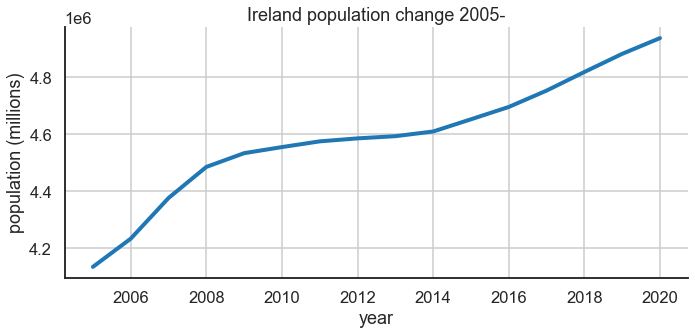

In [36]:
pop.plot(x='year',lw=4,figsize=(10,5),grid=True,legend=False)
plt.title('Ireland population change 2005-')
sns.despine()
plt.ylabel('population (millions)')
plt.tight_layout()
plt.savefig('ireland_population.png',dpi=100)

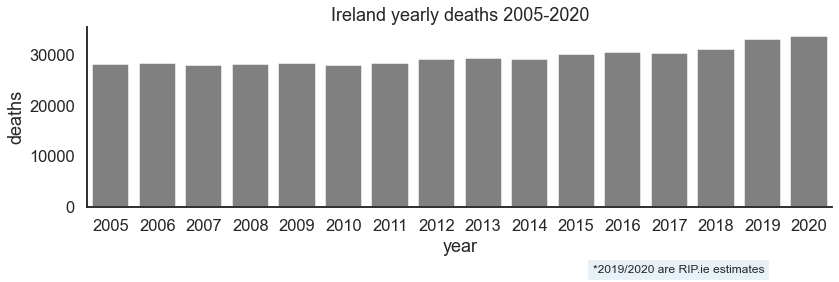

In [9]:
f,ax=plt.subplots(figsize=(12,4))
sns.barplot(data=cso,x='year',y='deaths',ax=ax,color='gray',ci=None,estimator=sum)
plt.title('Ireland yearly deaths 2005-2020')
sns.despine()
plt.figtext(0.7, 0.01, "*2019/2020 are RIP.ie estimates", fontsize=12, bbox={"alpha":0.1,"pad":5})
plt.tight_layout()
plt.savefig('ireland_deaths_cso_byyear.png',dpi=150)

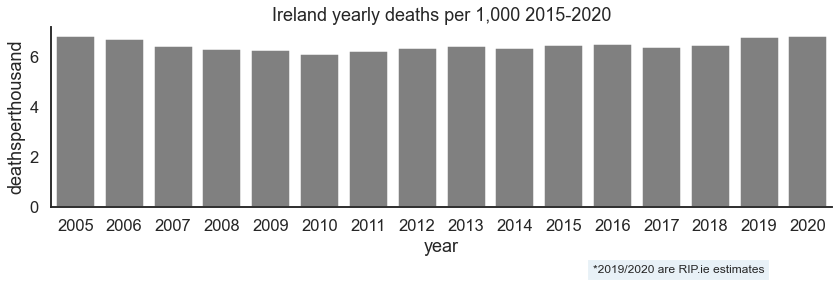

In [10]:
f,ax=plt.subplots(figsize=(12,4))
sns.barplot(data=cso,x='year',y='deathsperthousand',ax=ax,color='gray',ci=None,estimator=sum)
plt.title('Ireland yearly deaths per 1,000 2015-2020')
sns.despine()
plt.figtext(0.7, 0.01, "*2019/2020 are RIP.ie estimates", fontsize=12, bbox={"alpha":0.1,"pad":5})
plt.tight_layout()
plt.savefig('ireland_deathsperthousand_cso_byyear.png',dpi=150)

In [11]:
#totals per million 
totals = cso.groupby('year').agg({'deaths':np.sum}).reset_index()
totals=totals.merge(pop,on='year')#.dropna()
totals['deathsperthousand'] = (totals.deaths/totals['pop'])*1000
totals

,year,deaths,pop,deathsperthousand
0,2005,28260,4133800,6.836325
1,2006,28488,4232900,6.730138
2,2007,28117,4375800,6.425568
3,2008,28274,4485100,6.303984
4,2009,28380,4533400,6.260202
5,2010,27961,4554800,6.138799
6,2011,28456,4574900,6.220027
7,2012,29186,4585400,6.364985
8,2013,29504,4593100,6.423548
9,2014,29252,4609600,6.345887


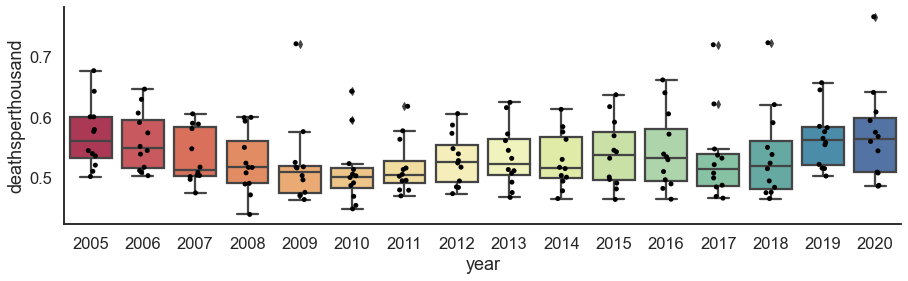

In [12]:
f,ax=plt.subplots(figsize=(15,4))
sns.boxplot(data=cso,x='year',y='deathsperthousand',ax=ax,palette='Spectral')
sns.stripplot(data=cso,x='year',y='deathsperthousand',ax=ax,color='black')
sns.despine()

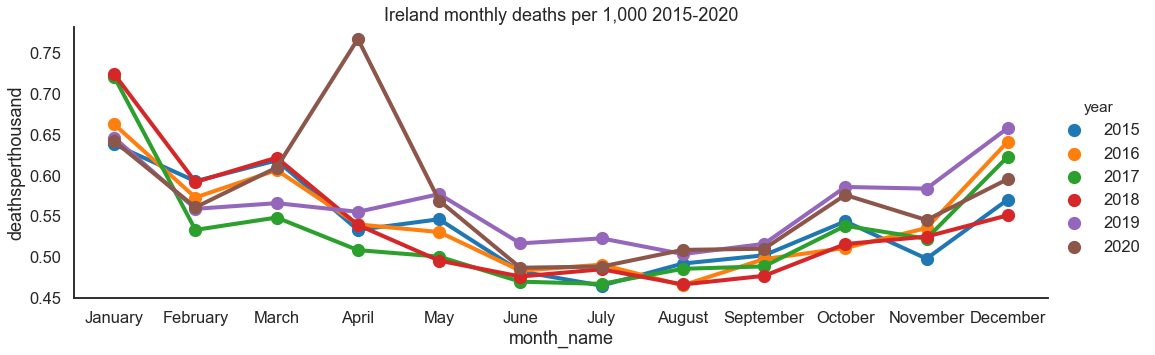

In [13]:
x = cso[cso.year>=2015]
sns.catplot(data=x,x='month_name',y='deathsperthousand',kind='point',aspect=3,hue='year')
plt.title('Ireland monthly deaths per 1,000 2015-2020')
plt.savefig('ireland_deaths_cso_bymonth.png',dpi=150)

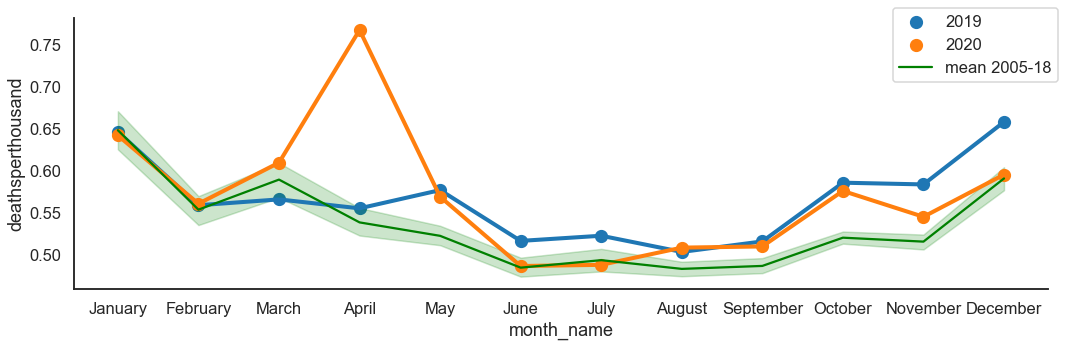

In [28]:
x=cso[(cso.year<2019) & (cso.year>=2005)]
x2 = cso[cso.year>=2019]
#fig, ax = plt.subplots(1,1)
fg=sns.catplot(data=x2,x='month_name',y='deathsperthousand',kind='point',hue='year',aspect=3,legend=False)
ax=sns.lineplot(data=x,x='month_name',y='deathsperthousand',color='g',sort=False,legend=False,ax=fg.ax)
l = plt.plot(0.5,0.5,color='g') # get a line handle
handles,labels = fg.axes.flat[0].get_legend_handles_labels()
handles.append(l[0])
fg.fig.legend(handles,["2019","2020","mean 2005-18"])
plt.savefig('ireland_deaths_cso_meantrend.png',dpi=150)

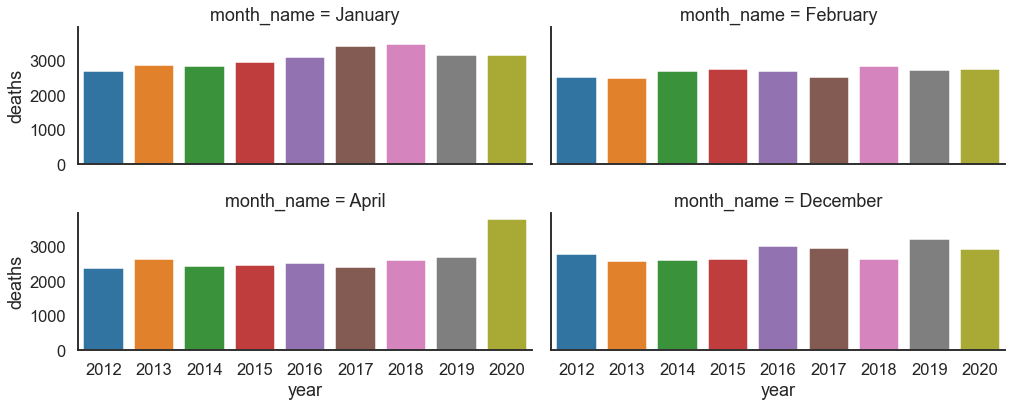

In [133]:
x=cso[cso.month.isin([1,2,4,12])]
sns.catplot(data=x,x='year',y='deaths',kind='bar',aspect=2.4,col='month_name',col_wrap=2,height=3)
plt.savefig('ireland_deaths_cso_months_compared.png',dpi=150)

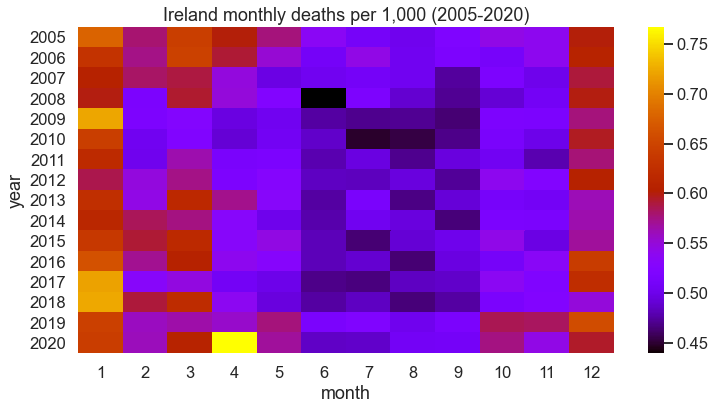

In [341]:
X = pd.pivot_table(cso, index='year',columns='month',values='deathsperthousand',aggfunc='sum')
f,ax=plt.subplots(figsize=(12,6))
sns.heatmap(X,ax=ax,cmap='gnuplot')
ax.set_title('Ireland monthly deaths per 1,000 (2005-2020)')
plt.savefig('ireland_deaths_cso_heatmap.png',dpi=150)